In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\ML\Life\Life.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [7]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df['Country'] = df['Country'].replace(['Afghanistan' , 'Albania' , 'Algeria' , 'Angola' , 'Antigua and Barbuda' , 'Argentina' , 'Armenia' , 'Australia' , 'Austria' , 'Azerbaijan' , 'Bahamas' , 'Bahrain' , 'Bangladesh' , 'Barbados' , 'Belarus' , 'Belgium' , 'Belize' , 'Benin' , 'Bhutan' , 'Bolivia (Plurinational State of)' , 'Bosnia and Herzegovina' , 'Botswana' , 'Brazil' , 'Brunei Darussalam' , 'Bulgaria' , 'Burkina Faso' , 'Burundi' , "Côte d'Ivoire" , 'Cabo Verde' , 'Cambodia' , 'Cameroon' , 'Canada' , 'Central African Republic' , 'Chad' , 'Chile' , 'China' , 'Colombia' , 'Comoros' , 'Congo' , 'Costa Rica' , 'Croatia' , 'Cuba' , 'Cyprus' , 'Czechia' , "Democratic People's Republic of Korea" , 'Democratic Republic of the Congo' , 'Denmark' , 'Djibouti' , 'Dominican Republic' , 'Ecuador' , 'Egypt' , 'El Salvador' , 'Equatorial Guinea' , 'Eritrea' , 'Estonia' , 'Ethiopia' , 'Fiji' , 'Finland' , 'France' , 'Gabon' , 'Gambia' , 'Georgia' , 'Germany' , 'Ghana' , 'Greece' , 'Grenada' , 'Guatemala' , 'Guinea' , 'Guinea-Bissau' , 'Guyana' , 'Haiti' , 'Honduras' , 'Hungary' , 'Iceland' , 'India' , 'Indonesia' , 'Iran (Islamic Republic of)' , 'Iraq' , 'Ireland' , 'Israel' , 'Italy' , 'Jamaica' , 'Japan' , 'Jordan' , 'Kazakhstan' , 'Kenya' , 'Kiribati' , 'Kuwait' , 'Kyrgyzstan' , "Lao People's Democratic Republic" , 'Latvia' , 'Lebanon' , 'Lesotho' , 'Liberia' , 'Libya' , 'Lithuania' , 'Luxembourg' , 'Madagascar' , 'Malawi' , 'Malaysia' , 'Maldives' , 'Mali' , 'Malta' , 'Mauritania' , 'Mauritius' , 'Mexico' , 'Micronesia (Federated States of)' , 'Mongolia' , 'Montenegro' , 'Morocco' , 'Mozambique' , 'Myanmar' , 'Namibia' , 'Nepal' , 'Netherlands' , 'New Zealand' , 'Nicaragua' , 'Niger' , 'Nigeria' , 'Norway' , 'Oman' , 'Pakistan' , 'Panama' , 'Papua New Guinea' , 'Paraguay' , 'Peru' , 'Philippines' , 'Poland' , 'Portugal' , 'Qatar' , 'Republic of Korea' , 'Republic of Moldova' , 'Romania' , 'Russian Federation' , 'Rwanda' , 'Saint Lucia' , 'Saint Vincent and the Grenadines' , 'Samoa' , 'Sao Tome and Principe' , 'Saudi Arabia' , 'Senegal' , 'Serbia' , 'Seychelles' , 'Sierra Leone' , 'Singapore' , 'Slovakia' , 'Slovenia' , 'Solomon Islands' , 'Somalia' , 'South Africa' , 'South Sudan' , 'Spain' , 'Sri Lanka' , 'Sudan' , 'Suriname' , 'Swaziland' , 'Sweden' , 'Switzerland' , 'Syrian Arab Republic' , 'Tajikistan' , 'Thailand' , 'The former Yugoslav republic of Macedonia' , 'Timor-Leste' , 'Togo' , 'Tonga' , 'Trinidad and Tobago' , 'Tunisia' , 'Turkey' , 'Turkmenistan' , 'Uganda' , 'Ukraine' , 'United Arab Emirates' , 'United Kingdom of Great Britain and Northern Ireland' , 'United Republic of Tanzania' , 'United States of America' , 'Uruguay' , 'Uzbekistan' , 'Vanuatu' , 'Venezuela (Bolivarian Republic of)' , 'Viet Nam' , 'Yemen' , 'Zambia' , 'Zimbabwe' , 'Cook Islands' , 'Dominica' , 'Marshall Islands' , 'Monaco' , 'Nauru' , 'Niue' , 'Palau' , 'Saint Kitts and Nevis' , 'San Marino' , 'Tuvalu'], [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63 ,64 ,65 ,66 ,67 ,68 ,69 ,70 ,71 ,72 ,73 ,74 ,75 ,76 ,77 ,78 ,79 ,80 ,81 ,82 ,83 ,84 ,85 ,86 ,87 ,88 ,89 ,90 ,91 ,92 ,93 ,94 ,95 ,96 ,97 ,98 ,99 ,100 ,101 ,102 ,103 ,104 ,105 ,106 ,107 ,108 ,109 ,110 ,111 ,112 ,113 ,114 ,115 ,116 ,117 ,118 ,119 ,120 ,121 ,122 ,123 ,124 ,125 ,126 ,127 ,128 ,129 ,130 ,131 ,132 ,133 ,134 ,135 ,136 ,137 ,138 ,139 ,140 ,141 ,142 ,143 ,144 ,145 ,146 ,147 ,148 ,149 ,150 ,151 ,152 ,153 ,154 ,155 ,156 ,157 ,158 ,159 ,160 ,161 ,162 ,163 ,164 ,165 ,166 ,167 ,168 ,169 ,170 ,171 ,172 ,173 ,174 ,175 ,176 ,177 ,178 ,179 ,180 ,181 ,182 ,183 ,184 ,185 ,186 ,187 ,188 ,189 ,190 ,191 ,192 ,193])

In [9]:
df['Status'] = df['Status'].replace(['Developing', 'Developed'],[1, 2])

In [10]:
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,1,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,1,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,1,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,1,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
df = df.fillna(df.mean())

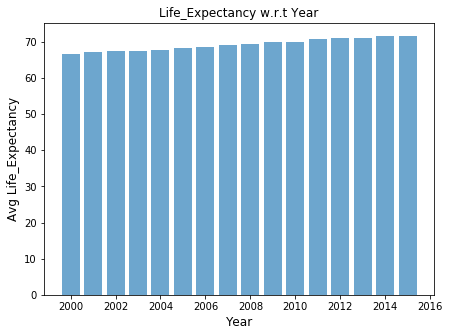

In [12]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Year')['Year'].count().index,df.groupby('Year')['Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

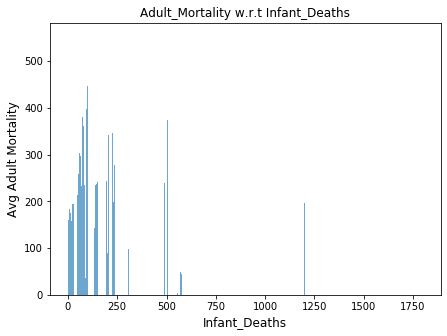

In [13]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Infant_Deaths')['Infant_Deaths'].count().index,df.groupby('Infant_Deaths')['Adult_Mortality'].mean(),alpha=0.65)
plt.xlabel("Infant_Deaths",fontsize=12)
plt.ylabel("Avg Adult Mortality",fontsize=12)
plt.title("Adult_Mortality w.r.t Infant_Deaths")
plt.show()

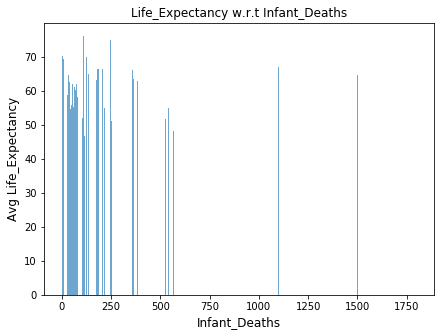

In [14]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Infant_Deaths')['Infant_Deaths'].count().index,df.groupby('Infant_Deaths')['Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Infant_Deaths",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Infant_Deaths")
plt.show()

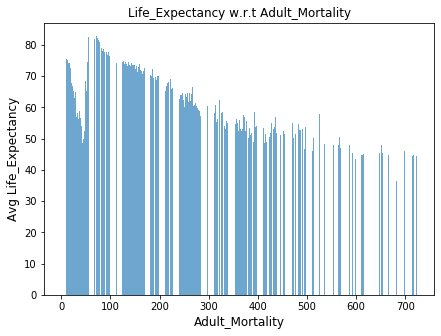

In [15]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Adult_Mortality')['Adult_Mortality'].count().index,df.groupby('Adult_Mortality')['Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Adult_Mortality",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Adult_Mortality")
plt.show()

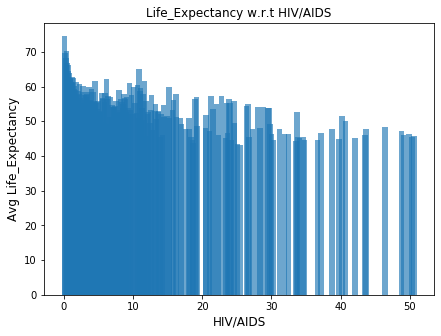

In [16]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('HIV/AIDS')['HIV/AIDS'].count().index,df.groupby('HIV/AIDS')['Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("HIV/AIDS",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t HIV/AIDS")
plt.show()

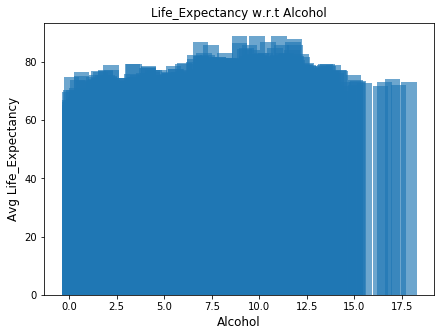

In [17]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Alcohol')['Alcohol'].count().index,df.groupby('Alcohol')['Life_Expectancy'].mean(),alpha=0.65)
plt.xlabel("Alcohol",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Alcohol")
plt.show()

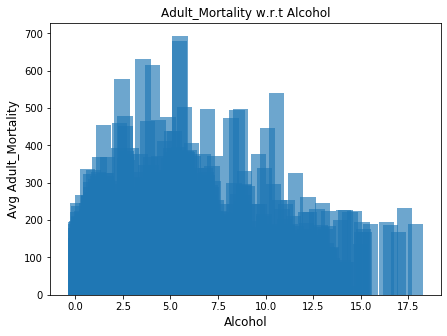

In [18]:
plt.figure(figsize=(7,5))
plt.bar(df.groupby('Alcohol')['Alcohol'].count().index,df.groupby('Alcohol')['Adult_Mortality'].mean(),alpha=0.65)
plt.xlabel("Alcohol",fontsize=12)
plt.ylabel("Avg Adult_Mortality",fontsize=12)
plt.title("Adult_Mortality w.r.t Alcohol")
plt.show()

C:\Users\Sohan\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


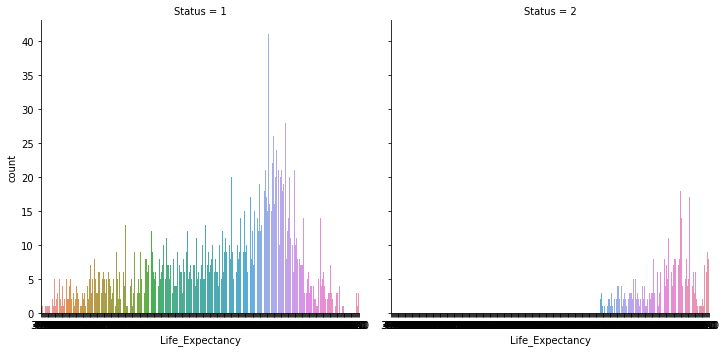

In [19]:
sns.factorplot('Life_Expectancy',col='Status',data=df,kind='count')

Text(0.5, 1.0, 'Schooling vs AdultMortality')

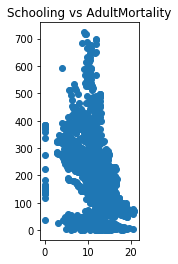

In [20]:
plt.subplot(1,3,1)
plt.scatter(df["Schooling"], df["Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

Text(0.5, 1.0, 'LifeExpectancy vs AdultMortality')

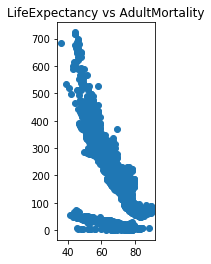

In [21]:
plt.subplot(1,3,2)
plt.scatter(df["Life_Expectancy"], df["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

In [22]:
corr_matrix=df.corr()

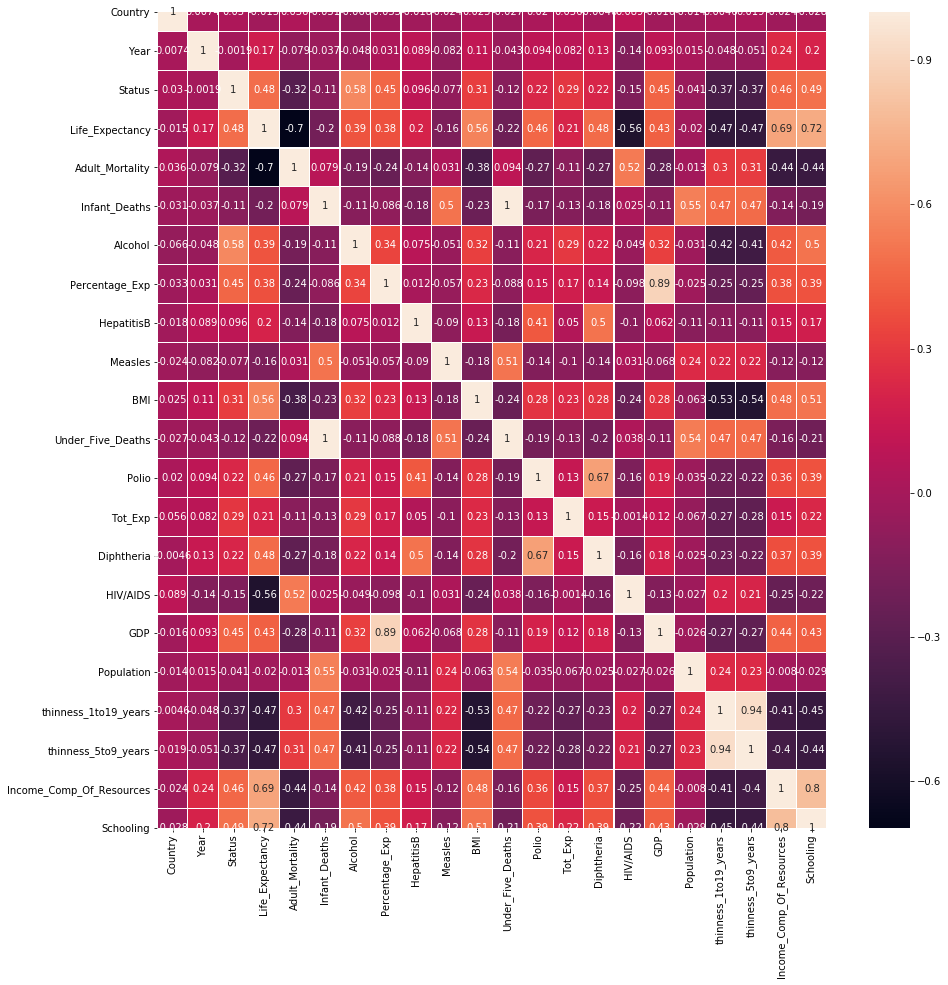

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.2)

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [25]:
train_x = train.loc[:, train.columns != "Life_Expectancy"]
test_x = test.loc[:, test.columns != "Life_Expectancy"]
train_y = train["Life_Expectancy"]
test_y = test["Life_Expectancy"]

In [26]:
coef=LinearRegression()
coef.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Y_pred = coef.predict(test_x)

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(coef,train_x,train_y)
print(scores)

[0.81493016 0.82926678 0.8064134 ]


C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [29]:
print('Variance score: %.2f' % r2_score(test_y, Y_pred))

Variance score: 0.82


In [30]:
print(mean_squared_error(test_y, Y_pred))

16.025341711341802
